In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import pandas as pd
import netCDF4
%matplotlib inline

In [3]:
areacella1 = xr.open_dataset('areacella_fx_CanESM5_historical_r10i1p1f1_gn.nc').areacella
areacella2 = xr.open_dataset('areacella_fx_CanESM5-CanOE_historical_r1i1p2f1_gn.nc').areacella
areacella3 = xr.open_dataset('areacella_fx_UKESM1-0-LL_piControl_r1i1p1f2_native.nc').areacella
areacella4 = xr.open_dataset('areacella_fx_CNRM-ESM2-1_historical_r10i1p1f2_gr.nc').areacella
areacella5 = xr.open_dataset('areacella_fx_IPSL-CM6A-LR_historical_r1i1p1f1_gr.nc').areacella
areacella6 = xr.open_dataset('areacella_fx_ACCESS-ESM1-5_historical_r1i1p1f1_gn.nc').areacella
areacella7 = xr.open_dataset('areacella_fx_MPI-ESM1-2-LR_historical_r1i1p1f1_gn.nc').areacella
areacella8 = xr.open_dataset('areacella_fx_MIROC-ES2L_historical_r10i1p1f2_gn.nc').areacella
areacella9 = xr.open_dataset('areacella_fx_INM-CM5-0_historical_r1i1p1f1_gr1.nc').areacella
areacella10 = xr.open_dataset('areacella_fx_INM-CM4-8_historical_r1i1p1f1_gr1.nc').areacella

In [4]:
landfrac1 = xr.open_dataset('sftlf_fx_CanESM5_ssp585_r1i1p1f1_gn.nc').sftlf
landfrac2 = xr.open_dataset('sftlf_fx_CanESM5-CanOE_historical_r1i1p2f1_gn.nc').sftlf
landfrac3 = xr.open_dataset('sftlf_fx_UKESM1-0-LL_piControl_r1i1p1f2_native.nc').sftlf
landfrac4 = xr.open_dataset('sftlf_fx_CNRM-ESM2-1_historical_r10i1p1f2_gr.nc').sftlf
landfrac5 = xr.open_dataset('sftlf_fx_IPSL-CM6A-LR_historical_r1i1p1f1_gr.nc').sftlf
landfrac6 = xr.open_dataset('sftlf_fx_ACCESS-ESM1-5_historical_r10i1p1f1_gn.nc').sftlf
landfrac7 = xr.open_dataset('sftlf_fx_MPI-ESM1-2-LR_historical_r1i1p1f1_gn.nc').sftlf
landfrac8 = xr.open_dataset('sftlf_fx_MIROC-ES2L_historical_r1i1p1f2_gn.nc').sftlf
landfrac9 = xr.open_dataset('sftlf_fx_INM-CM5-0_historical_r1i1p1f1_gr1.nc').sftlf
landfrac10 = xr.open_dataset('sftlf_fx_INM-CM4-8_historical_r1i1p1f1_gr1.nc').sftlf

In [5]:
area1 = areacella1 * landfrac1/100
area2 = areacella2 * landfrac2/100
area3 = areacella3 * landfrac3/100
area4 = areacella4 * landfrac4/100
area5 = areacella5 * landfrac5/100
area6 = areacella6 * landfrac6/100
area7 = areacella7 * landfrac7/100
area8 = areacella8 * landfrac8/100
area9 = areacella9 * landfrac9/100
area10 = areacella10 * landfrac10/100

In [6]:
ds1 = xr.open_dataset('ra_Lmon_CanESM5_hist_ssp585_r1i1p1f1_gn_185001-210012.nc')
ds2 = xr.open_dataset('ra_Lmon_CanESM5-CanOE_hist_ssp585_r1i1p2f1_gn_185001-210012.nc')
ds3 = xr.open_dataset('ra_Lmon_UKESM1-0-LL_hist_ssp585_r1i1p1f2_gn_185001-210012.nc')
ds4 = xr.open_dataset('ra_Lmon_CNRM-ESM2-1_hist_ssp585_r1i1p1f2_gr_185001-210012.nc')
ds5 = xr.open_dataset('ra_Lmon_IPSL-CM6A-LR_hist_ssp585_r1i1p1f1_gr_185001-210012.nc')
ds6 = xr.open_dataset('ra_Lmon_ACCESS-ESM1-5_hist_ssp585_r1i1p1f1_gn_185001-210012.nc')
ds7 = xr.open_dataset('ra_Lmon_MPI-ESM1-2-LR_hist_ssp585_r1i1p1f1_gn_185001-210012.nc')
ds8 = xr.open_dataset('ra_Lmon_MIROC-ES2L_hist_ssp585_r1i1p1f2_gn_185001-210012.nc')
ds9 = xr.open_dataset('ra_Lmon_INM-CM5-0_hist_ssp585_r1i1p1f1_gr1_185001-210012.nc')
ds10 = xr.open_dataset('ra_Lmon_INM-CM4-8_hist_ssp585_r1i1p1f1_gr1_185001-210012.nc')

In [7]:
dset_dict = {'CanESM5':ds1, 'CanESM5-CanOE':ds2, 'UKESM1-0-LL':ds3,  
             'CNRM-ESM2-1':ds4, 'IPSL-CM6A-LR':ds5, 'ACCESS-ESM1-5':ds6,
             'MPI-ESM1-2-LR':ds7, 'MIROC-ES2L':ds8,
             'INM-CM5-0':ds9, 'INM-CM4-8':ds10}

In [8]:
time_slice=slice('1850', '2100')

In [10]:
#initialize dictionary of xarray datasets
ra_dict = {}

for name, ds in dset_dict.items():
        
    ds = xr.decode_cf(ds)
    ds = ds.sel(time=time_slice)
    
    # convert from per second to per year
    yearsec = 365*24*60*60
    ds.ra.data = ds.ra.data * yearsec
    
    #convert from kg to GtC
    ds.ra.data = ds.ra.data/(1e12)
    ds.ra.attrs['units'] = 'GtC m-2 y-1'
    
    #nbp_mon=nbp_mon.sel(lon=slice(lon1,lon2), lat=slice(lat1,lat2))
    
    # drop redundant variables (like "height: 2m")
    for coord in ds.coords:
        if coord not in ['lat', 'lon', 'time']:
            ds = ds.drop(coord)

    ra_dict[name] = ds

In [11]:
glob1 = ra_dict['CanESM5'].ra.weighted(area1).sum(('lon','lat'))
glob2 = ra_dict['CanESM5-CanOE'].ra.weighted(area2).sum(('lon','lat'))
glob3 = ra_dict['UKESM1-0-LL'].ra.weighted(area3).sum(('lon','lat'))
glob4 = ra_dict['CNRM-ESM2-1'].ra.weighted(area4).sum(('lon','lat'))
glob5 = ra_dict['IPSL-CM6A-LR'].ra.weighted(area5).sum(('lon','lat'))
glob6 = ra_dict['ACCESS-ESM1-5'].ra.weighted(area6).sum(('lon','lat'))
glob7 = ra_dict['MPI-ESM1-2-LR'].ra.weighted(area7).sum(('lon','lat'))
glob8 = ra_dict['MIROC-ES2L'].ra.weighted(area8).sum(('lon','lat'))
glob9 = ra_dict['INM-CM5-0'].ra.weighted(area9).sum(('lon','lat'))
glob10 = ra_dict['INM-CM4-8'].ra.weighted(area10).sum(('lon','lat'))

In [12]:
gra_dict = {'CanESM5':glob1, 'CanESM5-CanOE':glob2, 'UKESM1-0-LL':glob3,  
             'CNRM-ESM2-1':glob4, 'IPSL-CM6A-LR':glob5, 'ACCESS-ESM1-5':glob6,
             'MPI-ESM1-2-LR':glob7, 'MIROC-ES2L':glob8,
             'INM-CM5-0':glob9, 'INM-CM4-8':glob10}

## Plotting Time Series: Changes in global mean nbp (1850-2100 wrt 1850-1900)

In [13]:
for name, gra in gra_dict.items():
    
    # drop redundant variables (like "type")
    for coord in gra.coords:
        if coord not in ['time']:
            gra = gra.drop(coord)
    
    # reference the GSAT relative to the 1850 to 1900 pre-industrial period
    gra_anomalies = gra - gra.sel(time=slice('1850','1900')).mean(dim='time')
    
    gra_ann_anomalies = gra_anomalies.groupby('time.year').mean('time')
        
    # renaming labels
    gra_ann_anomalies = gra_ann_anomalies.rename(
        r'Global-mean AR relative to 1850-1900 in GtC/yr'
    )
    
    gra_dict[name] = gra_ann_anomalies.compute()

In [14]:
gra_ann_anomalies.dims, gra_ann_anomalies.shape, gra_ann_anomalies.coords

(('year',),
 (251,),
 Coordinates:
   * year     (year) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100)

In [15]:
gra1_roll = gra_dict['CanESM5'].rolling(year=10).mean()
gra2_roll = gra_dict['CanESM5-CanOE'].rolling(year=10).mean()
gra3_roll = gra_dict['UKESM1-0-LL'].rolling(year=10).mean()
gra4_roll = gra_dict['CNRM-ESM2-1'].rolling(year=10).mean()
gra5_roll = gra_dict['IPSL-CM6A-LR'].rolling(year=10).mean()
gra6_roll = gra_dict['ACCESS-ESM1-5'].rolling(year=10).mean()
gra7_roll = gra_dict['MPI-ESM1-2-LR'].rolling(year=10).mean()
gra8_roll = gra_dict['MIROC-ES2L'].rolling(year=10).mean()
gra9_roll = gra_dict['INM-CM5-0'].rolling(year=10).mean()
gra10_roll = gra_dict['INM-CM4-8'].rolling(year=10).mean()

modelmean = (gra1_roll + gra2_roll + gra3_roll + gra4_roll +gra5_roll+gra6_roll 
             + gra7_roll + gra8_roll + gra9_roll +gra10_roll)/10

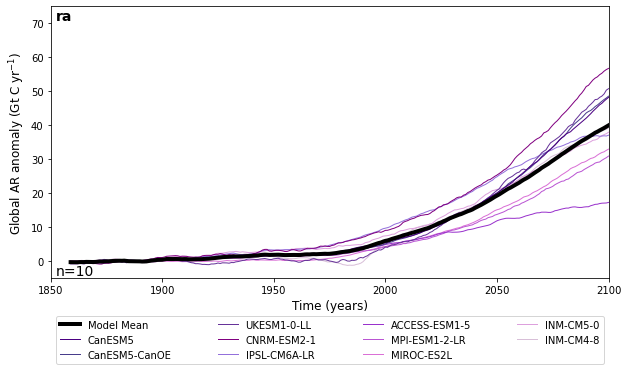

In [19]:
fig,ax = plt.subplots(figsize=(10,5))

gra10_roll.plot(linewidth=1, color= 'thistle',  label='INM-CM4-8')
gra9_roll.plot(linewidth=1, color= 'plum', label='INM-CM5-0')
gra8_roll.plot(linewidth=1, color= 'orchid', label='MIROC-ES2L')
gra7_roll.plot(linewidth=1, color= 'mediumorchid',  label='MPI-ESM1-2-LR')
gra6_roll.plot(linewidth=1, color= 'darkorchid', label='ACCESS-ESM1-5')
gra5_roll.plot(linewidth=1, color= 'mediumpurple',  label='IPSL-CM6A-LR')
gra4_roll.plot(linewidth=1, color= 'purple', label='CNRM-ESM2-1')
gra3_roll.plot(linewidth=1, color= 'rebeccapurple', label='UKESM1-0-LL')
gra2_roll.plot(linewidth=1, color= 'darkslateblue', label='CanESM5-CanOE')
gra1_roll.plot(linewidth=1, color= 'indigo', label='CanESM5')

modelmean.plot(linewidth=4, color= 'black', label= 'Model Mean')

#add right colors
#N = 6
#plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.RdYlGn(np.linspace(0,1,N)))

# set titel and name for axes
#plt.title('Historical & SSP5-8.5', fontsize = 15, fontweight = 'bold')
ax.text(0.01, 0.95, 'ra', 
        transform=ax.transAxes, ha="left", fontsize= 14, fontweight = 'bold')
ax.text(0.009, 0.01, 'n=10', 
        transform=ax.transAxes, ha="left", fontsize= 14)
plt.xlabel('Time (years)', fontsize = 12)
plt.ylabel(r'Global AR anomaly (Gt C yr$^{\minus1}$)', fontsize = 12)
plt.xlim([1850,2100])
plt.ylim([-5,75])


# plotting legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],bbox_to_anchor=(0, -0.12, 1, 0), loc="upper left", mode="expand", ncol=4)

plt.savefig("TimeSeriesMultiModelCarbonChanges585.png", bbox_inches="tight")
plt.show();

In [20]:
max_ra = max(modelmean)  # Find the maximum y value
max_year = modelmean[modelmean.argmax()]  # Find the x value corresponding to the maximum y value
print (max_year, max_ra)

<xarray.DataArray 'Global-mean AR relative to 1850-1900 in GtC/yr' ()>
array(39.98335177)
Coordinates:
    year     int64 2100 <xarray.DataArray 'Global-mean AR relative to 1850-1900 in GtC/yr' ()>
array(nan)
Coordinates:
    year     int64 1850


In [21]:
modelmean.sel(year=slice('2024','2034'))

<xarray.DataArray 'Global-mean AR relative to 1850-1900 in GtC/yr' (year: 11)>
array([11.17698152, 11.40297539, 11.74329762, 11.99734086, 12.32299358,
       12.65734133, 12.9109319 , 13.19125246, 13.44111886, 13.68838015,
       13.88576202])
Coordinates:
  * year     (year) int64 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034

In [22]:
modelmean.sel(year=slice('2024','2034')).mean()

<xarray.DataArray 'Global-mean AR relative to 1850-1900 in GtC/yr' ()>
array(12.5834887)

In [23]:
modelmean.sel(year=slice('2037','2047'))

<xarray.DataArray 'Global-mean AR relative to 1850-1900 in GtC/yr' (year: 11)>
array([14.72624526, 14.94176241, 15.22244742, 15.60855872, 15.94041726,
       16.27778401, 16.61076561, 16.98372748, 17.32837238, 17.73598176,
       18.09593075])
Coordinates:
  * year     (year) int64 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047

In [24]:
modelmean.sel(year=slice('2037','2047')).mean()

<xarray.DataArray 'Global-mean AR relative to 1850-1900 in GtC/yr' ()>
array(16.31563573)

In [25]:
modelmean.sel(year=slice('2090','2100'))

<xarray.DataArray 'Global-mean AR relative to 1850-1900 in GtC/yr' (year: 11)>
array([36.14635802, 36.54309506, 36.94728519, 37.37311022, 37.80894328,
       38.11652528, 38.49390785, 38.83289534, 39.20359874, 39.59052123,
       39.98335177])
Coordinates:
  * year     (year) int64 2090 2091 2092 2093 2094 2095 2096 2097 2098 2099 2100

In [26]:
modelmean.sel(year=slice('2090','2100')).mean()

<xarray.DataArray 'Global-mean AR relative to 1850-1900 in GtC/yr' ()>
array(38.09450836)

In [27]:
modelmean.sel(year=slice('2077','2087'))

<xarray.DataArray 'Global-mean AR relative to 1850-1900 in GtC/yr' (year: 11)>
array([30.49239282, 30.95989401, 31.45892593, 31.87677995, 32.33907603,
       32.7786488 , 33.23202397, 33.6496994 , 34.09896827, 34.5217823 ,
       34.97595748])
Coordinates:
  * year     (year) int64 2077 2078 2079 2080 2081 2082 2083 2084 2085 2086 2087

In [ ]:
modelmean.sel(year=slice('2077','2087')).mean()